In [2]:
import pandas as pd 
import numpy as np 
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [19]:
# load img n ann 
img_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_ms_val/images"
ann_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_ms_val/annfiles"
img_files = sorted(glob(img_folder+"/*.png"))
ann_files = sorted(glob(ann_folder+"/*.txt"))

index_ = 0
img = img_files[index_]
ann = ann_files[index_]

with open(ann) as f:
    ann_lines = f.readlines()
print(len(ann_lines))

index_line_ = 0
single_ann_line = ann_lines[index_line_]
poly_box = [float(i) for i in ann_lines[index_line_].split()[0:8]]
label_class = ann_lines[index_line_].split()[8]
print(poly_box)
print(label_class)

50
[937.0, 913.0, 921.0, 912.0, 923.0, 874.0, 940.0, 875.0]
small-vehicle


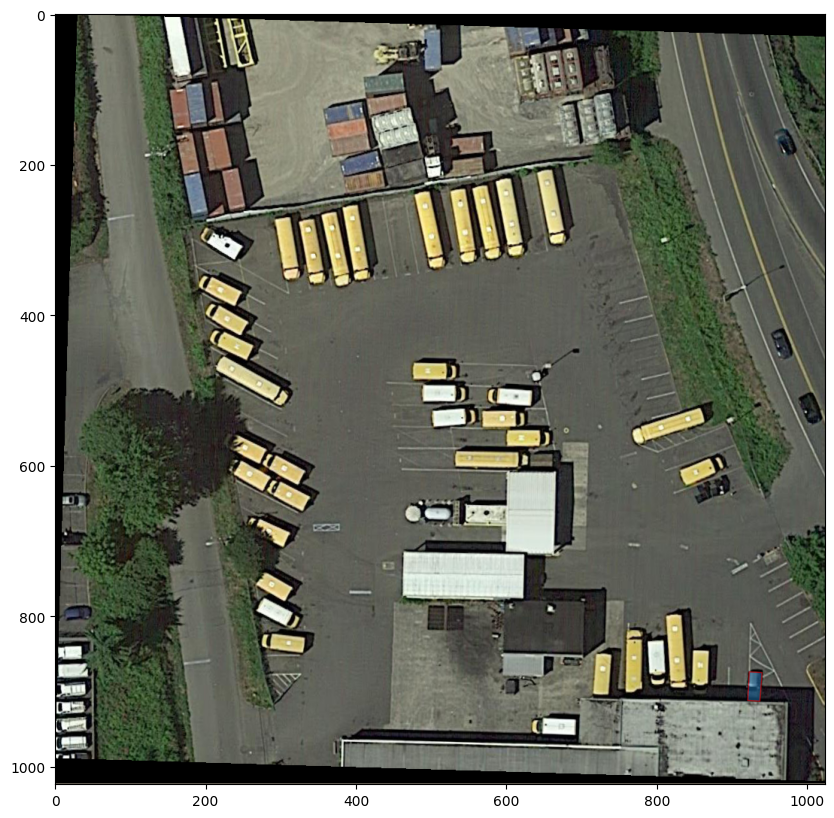

In [14]:
vertices = np.asarray(poly_box).reshape((4,2))
polygon = patches.Polygon(vertices, closed=True, fill=True, edgecolor='r', alpha=0.5)
fig,ax = plt.subplots(figsize=(10,10))
ax.add_patch(polygon)

img_ = Image.open(img)
plt.imshow(img_)

In [15]:
from shapely.geometry import Polygon
import cv2

/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v1/images/crops_img_0_instance_0_.png


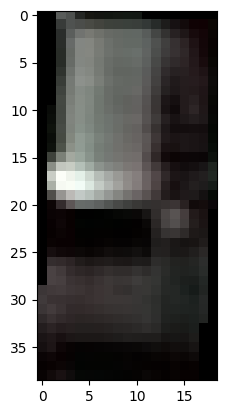

In [25]:
# Example polygon coordinates (replace with actual polygon coordinates)
polygon_coords = vertices

# Create a Shapely Polygon object
polygon = Polygon(polygon_coords)

# Assuming `image` is your original image
image = cv2.imread(img)

# Create a mask image with the same shape as the original image
mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)

# Draw the filled polygon on the mask
cv2.fillPoly(mask, [np.array(polygon_coords, dtype=np.int32)], color=255)

# Bitwise AND operation to get the cropped region
cropped_image = cv2.bitwise_and(image, image, mask=mask)

# mask to rectangle
xs, ys = [i[0] for i in vertices], [i[1] for i in vertices]
x_max,x_min = int(max(xs)), int(min(xs))
y_max,y_min = int(max(ys)), int(min(ys))

cropped_image_rec = cropped_image[ y_min:y_max, x_min:x_max, :]

# Save the result
dst_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v1"
sep = "images"
file_path = f"crops_img_{index_}_instance_{index_line_}_.png"
img_result = os.path.join(dst_folder, sep, file_path)
print(img_result)    
cv2.imwrite(img_result,cropped_image_rec)

# Display the result
cv2.imwrite('crop_mask_rec4.png',cropped_image_rec)
plt.imshow(cropped_image_rec)
#cv2.imshow('Cropped Image', cropped_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [20]:
single_ann_line

'937.0 913.0 921.0 912.0 923.0 874.0 940.0 875.0 small-vehicle 0\n'

In [22]:
# Specify the file path
dst_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v1"
sep = "anns"
file_path = 'output.txt'

ann_result = os.path.join(dst_folder, sep, file_path)
# Open the file in write mode and save the line
with open(ann_result, 'w') as file:
    file.write(single_ann_line)